In [1]:
img = "E:/CV_WORK/Real-Time-Object-Detection-YOLO-ViT/dataset/test/images/000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg"

In [3]:
!pip install torch

  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [7]:
import torch

torch.cuda.is_available()

False

In [35]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valentynsichkar/yolo-coco-data")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 220M/220M [00:19<00:00, 11.6MB/s]

Extracting files...


Path to dataset files: C:\Users\binuo\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3


In [127]:
weights_path = 'C:/Users/binuo/.cache/kagglehub/datasets/valentynsichkar/yolo-coco-data/versions/3/yolov3.weights'
configuration_path ='C:/Users/binuo/.cache/kagglehub/datasets/valentynsichkar/yolo-coco-data/versions/3/yolov3.cfg'
labels_path ='C:/Users/binuo/.cache/kagglehub/datasets/valentynsichkar/yolo-coco-data/versions/3/coco.name'

In [129]:
paths = r"C:\Users\binuo\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3\coco.names"
labels = open(paths).read().strip().split("\n")
print(f"Total COCO dataset size :{len(labels)}")
print(labels)


Total COCO dataset size :80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [131]:
import cv2
#loading yolo network
network = cv2.dnn.readNetFromDarknet(configuration_path,weights_path)

layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]

print(layers_names_output)
probability_minimum=0.5
threshold=0.3

['yolo_82', 'yolo_94', 'yolo_106']


In [133]:
net = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
img = cv2.imread("E:/CV_WORK/Real-Time-Object-Detection-YOLO-ViT/dataset/test/images/000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg")
blob = cv2.dnn.blobFromImage(img, 1 / 255, (320, 320), [0, 0, 0], 1, crop=False)
blob

array([[[[          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0],
         ...,
         [          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0]],

        [[          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0],
         [          0,           0,           0, ...,           0,           0,           0],
         ...,
         [          0,           0,           0, ...,           0,           0,           0],
         [          0,        

In [135]:
net.setInput(blob)

In [137]:
layersNames = net.getLayerNames()
print(layersNames)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [139]:
print(net.getUnconnectedOutLayers()) 

[200 227 254]


In [141]:
outputNames =  [layers_names_all[i-1] for i in net.getUnconnectedOutLayers()]
print(outputNames)

['yolo_82', 'yolo_94', 'yolo_106']


In [143]:
outputs = net.forward(outputNames)
outputs

(array([[   0.035831,     0.04328,     0.41386, ...,           0,           0,           0],
        [   0.055345,    0.044812,     0.36149, ...,           0,           0,           0],
        [   0.067505,    0.054203,      1.0241, ...,           0,           0,           0],
        ...,
        [    0.94443,     0.94231,     0.55854, ...,           0,           0,           0],
        [    0.94881,     0.95242,     0.40349, ...,           0,           0,           0],
        [    0.95351,     0.95188,      1.1547, ...,           0,           0,           0]], dtype=float32),
 array([[   0.027065,    0.027019,    0.076424, ...,           0,           0,           0],
        [   0.016642,    0.024568,      0.4278, ...,           0,           0,           0],
        [   0.024296,    0.020719,     0.10821, ...,           0,           0,           0],
        ...,
        [    0.96463,     0.97611,    0.059131, ...,           0,           0,           0],
        [    0.97805,      

In [144]:
height, width, channel = img.shape

In [147]:
print(height, width, channel)

640 640 3


In [149]:
import numpy as np
Bounding_box = []  # contains -> x, y, w, h
classIds = []  # contains all class IDS
confs = [] 

In [151]:
for output in outputs:
    for detect in output:
        scores = detect[5:]  # Class scores are from the 6th element onward
        classId = np.argmax(scores)  # Find class ID with max score
        confidence = scores[classId]  # Confidence of that class
        
        if confidence > 0.5:
            center_x = int(detect[0] * width)
            center_y = int(detect[1] * height)
            w = int(detect[2] * width)
            h = int(detect[3] * height)
            
            # Get top-left corner coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            Bounding_box.append([x, y, w, h])
            classIds.append(classId)
            confs.append(float(confidence))


indices = cv2.dnn.NMSBoxes(Bounding_box, confs, 0.4, 0.4)

# Draw bounding boxes on the image
for i in range(len(Bounding_box)):
    if len(indices) > 0 and i in indices.flatten():  
        x, y, w, h = Bounding_box[i]
        label = str(labels[classIds[i]])
        confidence = confs[i]
        color = (255, 255, 0)  # Green color for bounding box
        
        
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

# Display the final image with bounding boxes
cv2.imshow("Detected Objects", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [83]:
from matplotlib import pyplot as plt

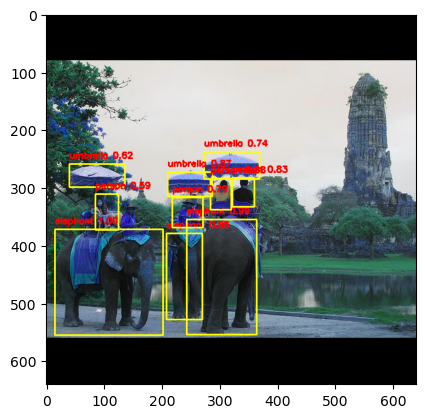

In [85]:
plt.imshow(img)

In [93]:
results = model.predict("E:/CV_WORK/Real-Time-Object-Detection-YOLO-ViT/dataset/test/images/000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg")
result = results[0]
#print(result)
print(len(result.boxes))




image 1/1 E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\dataset\test\images\000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg: 640x640 7 persons, 4 elephants, 2 umbrellas, 93.0ms
Speed: 4.7ms preprocess, 93.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
13


Object type: elephant
Coordinates: [18, 373, 190, 547]
Probability: 0.9
Object type: elephant
Coordinates: [256, 352, 371, 553]
Probability: 0.7
Object type: elephant
Coordinates: [208, 353, 372, 551]
Probability: 0.55
Object type: person
Coordinates: [129, 330, 160, 374]
Probability: 0.51
Object type: person
Coordinates: [284, 287, 321, 357]
Probability: 0.48
Object type: person
Coordinates: [322, 284, 360, 341]
Probability: 0.44
Object type: elephant
Coordinates: [208, 354, 276, 534]
Probability: 0.39
Object type: umbrella
Coordinates: [40, 261, 141, 304]
Probability: 0.32
Object type: umbrella
Coordinates: [269, 238, 370, 308]
Probability: 0.31
Object type: person
Coordinates: [79, 302, 132, 376]
Probability: 0.3
Object type: person
Coordinates: [128, 329, 179, 384]
Probability: 0.27
Object type: person
Coordinates: [248, 308, 283, 373]
Probability: 0.25
Object type: person
Coordinates: [229, 316, 271, 371]
Probability: 0.25


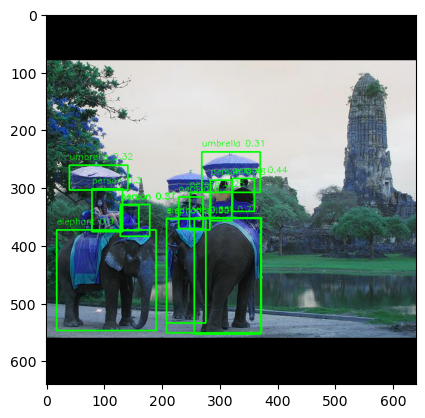

In [99]:
img = cv2.imread("E:/CV_WORK/Real-Time-Object-Detection-YOLO-ViT/dataset/test/images/000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg")


for box in result.boxes:
   
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]  
    x1, y1, x2, y2 = cords 

    # Class name (lookup using class ID)
    class_id = result.names[box.cls[0].item()]
    conf = round(box.conf[0].item(), 2)  

    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)

    
    color = (0, 255, 0) 
    thickness = 2 

   
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    # Add label with class name and confidence score
    label = f"{class_id} {conf}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    cv2.putText(img, label, (x1, y1 - 10), font, font_scale, color, font_thickness)

# Display the image with the drawn bounding boxes
cv2.imshow("Detected Objects", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [105]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolov6n.yaml")

# Display model information (optional)
model.info()

YOLOv6n summary: 195 layers, 4,500,080 parameters, 4,500,064 gradients, 13.1 GFLOPs


(195, 4500080, 4500064, 13.1051008)

In [107]:
image = "E:/CV_WORK/Real-Time-Object-Detection-YOLO-ViT/dataset/test/images/000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg"

results = model.train(data="coco8.yaml", epochs=100, imgsz=640)


results = model(image)
results

Ultralytics 8.3.57  Python-3.12.7 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov6n.yaml, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|███████████████████████████████████████████████████████████████████████████████| 433k/433k [00:00<00:00, 3.76MB/s]
Unzipping E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets\coco8.zip to E:\CV_WORK\Real-Time-Object-Detection-YO

Dataset download success  (2.9s), saved to E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets



activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7                  -1  1    295424  ultralytics.nn.modules.conv

train: Scanning E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets\coco8\labels\train... 4 images, 0 backgrounds, 

train: New cache created: E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets\coco8\labels\train.cache



val: Scanning E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets\coco8\labels\val... 4 images, 0 backgrounds, 0 co

val: New cache created: E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\datasets\coco8\labels\val.cache


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.488      5.685      4.317         22        640: 100%|██████████| 1/1 [00:03<00:00,  3.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      3.345      5.748      4.356         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       3.14      5.654      4.321         16        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      3.061      5.714      4.356         35        640: 100%|██████████| 1/1 [00:01<00:00,  1.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      3.436      5.563      4.355         25        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      2.806      5.279       4.32         31        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      2.907       5.82      4.415         25        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      3.496      5.739      4.356         14        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      3.076      5.596      4.273         36        640: 100%|██████████| 1/1 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      3.523      5.516       4.27         27        640: 100%|██████████| 1/1 [00:01<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      3.351      5.766      4.289         29        640: 100%|██████████| 1/1 [00:01<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      3.117      5.885      4.368         21        640: 100%|██████████| 1/1 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      3.277      5.634      4.349         40        640: 100%|██████████| 1/1 [00:01<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      2.836      5.587       4.31         14        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      3.101      5.803       4.28         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      3.514      5.434      4.372         28        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      3.217       5.82      4.419         26        640: 100%|██████████| 1/1 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      3.097      5.743      4.263         33        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      3.365      5.511      4.295         42        640: 100%|██████████| 1/1 [00:01<00:00,  1.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      3.447      5.726      4.332         18        640: 100%|██████████| 1/1 [00:01<00:00,  1.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      3.216      5.506      4.301         16        640: 100%|██████████| 1/1 [00:01<00:00,  1.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      2.998      5.526      4.261         29        640: 100%|██████████| 1/1 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      3.124      5.527      4.308         27        640: 100%|██████████| 1/1 [00:01<00:00,  1.29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      3.303       5.41      4.235         20        640: 100%|██████████| 1/1 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G       3.39       5.56       4.36         27        640: 100%|██████████| 1/1 [00:01<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      3.319      5.556      4.381         28        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      3.066      5.523      4.262         24        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      3.221      5.582      4.313         34        640: 100%|██████████| 1/1 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      3.202      5.697       4.32         36        640: 100%|██████████| 1/1 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      3.304       5.47      4.261         33        640: 100%|██████████| 1/1 [00:01<00:00,  1.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      3.225      5.511      4.309         44        640: 100%|██████████| 1/1 [00:01<00:00,  1.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      2.903      5.693      4.308         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      2.851      5.696       4.33         10        640: 100%|██████████| 1/1 [00:01<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      3.004      5.642      4.286         33        640: 100%|██████████| 1/1 [00:01<00:00,  1.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      3.206      5.384      4.263         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      2.866       5.66       4.34         29        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      3.647      5.594      4.337         24        640: 100%|██████████| 1/1 [00:01<00:00,  1.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      2.691      5.918      4.276         16        640: 100%|██████████| 1/1 [00:01<00:00,  1.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      3.049       5.61      4.241         18        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      3.041       5.43      4.417         26        640: 100%|██████████| 1/1 [00:01<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      3.171      5.836      4.242         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      3.135      5.916       4.33         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      3.188       5.45      4.287         31        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      3.325      5.475      4.301         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      2.766      5.577       4.34         31        640: 100%|██████████| 1/1 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      3.196      5.496      4.247         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      3.237      5.359      4.304         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      3.334      5.435      4.322         36        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G       2.79      5.481      4.292         15        640: 100%|██████████| 1/1 [00:01<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.902      5.288      4.319         24        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      3.299       5.57      4.302         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      2.983      5.679        4.3         16        640: 100%|██████████| 1/1 [00:01<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      2.798      5.409      4.314         20        640: 100%|██████████| 1/1 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      3.463      5.486      4.306         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.659      5.743      4.316         26        640: 100%|██████████| 1/1 [00:01<00:00,  1.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      3.606      5.945      4.254         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      3.099      5.438      4.271         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      3.474      5.387      4.282         46        640: 100%|██████████| 1/1 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      3.663       5.48      4.287         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      3.465      5.659      4.273         14        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      2.949      5.542      4.389         34        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      3.171       5.48      4.307         49        640: 100%|██████████| 1/1 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      3.168      5.459      4.394         28        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      3.402      5.534      4.288         30        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      3.285      5.455      4.283         19        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      3.355      5.775      4.219         18        640: 100%|██████████| 1/1 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      3.239      5.425      4.281         60        640: 100%|██████████| 1/1 [00:01<00:00,  1.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      3.057      5.376      4.192         31        640: 100%|██████████| 1/1 [00:01<00:00,  1.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      3.028      5.486       4.26         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G       3.52      5.411        4.3         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G       3.52      5.501      4.225         33        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      3.373       5.52      4.252         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      3.294      5.313      4.298         38        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      3.142      5.536      4.332         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      3.255      5.298      4.281         25        640: 100%|██████████| 1/1 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      3.065        5.4      4.218         27        640: 100%|██████████| 1/1 [00:01<00:00,  1.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      3.094       5.42      4.313         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      3.291      5.371        4.3         44        640: 100%|██████████| 1/1 [00:01<00:00,  1.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      3.201      5.394      4.296         18        640: 100%|██████████| 1/1 [00:01<00:00,  1.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      3.233      5.494      4.301         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      2.773      5.428      4.303         35        640: 100%|██████████| 1/1 [00:01<00:00,  1.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      3.402      5.487      4.314         37        640: 100%|██████████| 1/1 [00:01<00:00,  2.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G       3.52      5.448      4.282         45        640: 100%|██████████| 1/1 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G       3.08      5.536      4.289         27        640: 100%|██████████| 1/1 [00:01<00:00,  1.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      3.188      5.289      4.303         20        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      3.039       5.74      4.316         20        640: 100%|██████████| 1/1 [00:01<00:00,  1.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      3.315      5.532      4.291         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      2.922      5.455      4.283         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      2.897      5.328      4.216         19        640: 100%|██████████| 1/1 [00:01<00:00,  1.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      3.133      5.231      4.373         39        640: 100%|██████████| 1/1 [00:02<00:00,  2.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      2.945      5.667      4.265         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      2.621      6.096      4.488         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      3.088      5.491      4.269         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      2.862      5.851      4.253         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      2.903      5.556      4.293         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      2.857      5.513      4.252         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.52
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      2.725      5.668      4.276         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      2.849      5.616      4.263         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      2.906      5.546      4.268         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G       2.97      5.492      4.226         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.52
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0



100 epochs completed in 0.074 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 9.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 9.2MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.57  Python-3.12.7 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLOv6n summary (fused): 142 layers, 4,495,392 parameters, 0 gradients, 13.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17          0          0          0          0


Speed: 2.6ms preprocess, 94.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train11

image 1/1 E:\CV_WORK\Real-Time-Object-Detection-YOLO-ViT\dataset\test\images\000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg: 640x640 (no detections), 101.9ms
Speed: 3.0ms preprocess, 101.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [117]:
image = cv2.imread(image)
for box in result.boxes:
   
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]  
    x1, y1, x2, y2 = cords 

    # Class name (lookup using class ID)
    class_id = result.names[box.cls[0].item()]
    conf = round(box.conf[0].item(), 2)  

    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)

    
    color = (0, 255, 0) 
    thickness = 2 

   
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Add label with class name and confidence score
    label = f"{class_id} {conf}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    cv2.putText(image, label, (x1, y1 - 10), font, font_scale, color, font_thickness)

# Display the image with the drawn bounding boxes
cv2.imshow("Detected Objects", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Object type: elephant
Coordinates: [18, 373, 190, 547]
Probability: 0.9
Object type: elephant
Coordinates: [256, 352, 371, 553]
Probability: 0.7
Object type: elephant
Coordinates: [208, 353, 372, 551]
Probability: 0.55
Object type: person
Coordinates: [129, 330, 160, 374]
Probability: 0.51
Object type: person
Coordinates: [284, 287, 321, 357]
Probability: 0.48
Object type: person
Coordinates: [322, 284, 360, 341]
Probability: 0.44
Object type: elephant
Coordinates: [208, 354, 276, 534]
Probability: 0.39
Object type: umbrella
Coordinates: [40, 261, 141, 304]
Probability: 0.32
Object type: umbrella
Coordinates: [269, 238, 370, 308]
Probability: 0.31
Object type: person
Coordinates: [79, 302, 132, 376]
Probability: 0.3
Object type: person
Coordinates: [128, 329, 179, 384]
Probability: 0.27
Object type: person
Coordinates: [248, 308, 283, 373]
Probability: 0.25
Object type: person
Coordinates: [229, 316, 271, 371]
Probability: 0.25
